# Implement the Logistic Regression Algorithm with Regularization for Binary Classification

In [76]:
import numpy as np

def sigmoid(z):
  return 1 / (1 + np.exp(-z))

class LogisticRegression:
  def __init__(self, lr=0.01, num_epochs=10000, lambda_=0.01):
    self.lr = lr
    self.lambda_ = lambda_
    self.num_epochs = num_epochs
    self.weights = None
    self.bias = None

  def fit(self, X, y, print_interval=10):
    # Convert X and y to numpy arrays if they are not already
    X = X.values if not isinstance(X, np.ndarray) else X
    y = y.values if not isinstance(y, np.ndarray) else y
    # Initialize parameters as zeroes
    num_examples, num_features = X.shape
    self.weights = np.zeros(num_features)
    self.bias = 0
    # Run the implemented Gradient Descent Algorithm
    J_history = self._gradient_descent(X, y, print_interval)
    return J_history

  def _compute_cost(self, X, y):
    num_examples, num_features = X.shape
    cost = 0 # logistic regression cost
    reg_cost = 0 # regularization term that needs to be added to the logistic regression cost to implement regularization
    for i in range(num_examples):
      z = np.dot(X[i], self.weights) + self.bias
      f = sigmoid(z)
      cost += - ( y[i] * np.log(f) )  -  ( (1-y[i]) * np.log(1-f) )
    cost /= num_examples
    reg_cost = np.sum((self.weights ** 2))
    reg_cost *= self.lambda_ / (2 * num_examples)
    total_cost = cost + reg_cost
    return total_cost

  def _compute_gradient(self, X, y):
    # dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w
    # dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b
    num_examples, num_features = X.shape
    dj_dw = np.zeros(num_features)
    dj_db = 0
    for i in range(num_examples):
      err = sigmoid( np.dot(X[i], self.weights) + self.bias ) - y[i]
      dj_db += err
      dj_dw += err * X[i]
    dj_dw = dj_dw / num_examples
    dj_db = dj_db / num_examples
    dj_dw += (self.lambda_ / num_examples) * self.weights # Add gradient term for regularization
    return dj_db, dj_dw

  def _gradient_descent(self, X, y, print_interval=10):
    import math
    J_history = [] # history of the cost function throughout the gradient descent
    for i in range(1, self.num_epochs + 1):
      dj_db, dj_dw = self._compute_gradient(X, y)
      # Update Parameters using computed gradients in each iteration
      self.weights = self.weights - self.lr * dj_dw
      self.bias = self.bias - self.lr * dj_db
      # Save cost J at each iteration
      cost = self._compute_cost(X, y)
      J_history.append(cost)
      # Print cost every: print_interval number of intervals
      if i == 1 or i % math.ceil(self.num_epochs / print_interval) == 0:
        print(f"Epoch {i}: Cost {cost}")
    print('\n')
    return J_history # for plotting

  def predict(self, X):
    linear_pred = np.dot(X, self.weights) + self.bias
    y_pred_probabilities = sigmoid(linear_pred)
    y_pred = [0 if y<=0.5 else 1 for y in y_pred_probabilities]
    return np.array(y_pred)

  def get_params(self):
    return self.weights, self.bias

# Load a dataset that cannot be classified using a linear boundary
So that we will be forced to implement regularization along with Logistic Regression as we will make do feature engineering and make polynomial features from the existing features in the dataset.

The shape of X is: (118, 2)
The shape of y is: (118,)


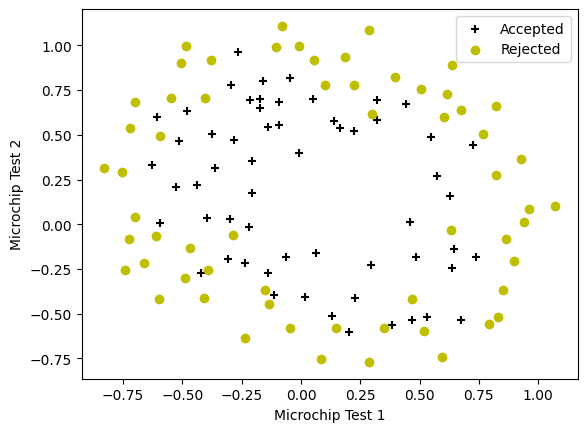

In [77]:
import os
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

def load_data(filename):
  data = np.loadtxt(filename, delimiter=',')
  X = data[:,:2]
  y = data[:,2]
  return X, y

nb_dir = os.path.abspath('')
data_dir = os.path.join(nb_dir, 'Data', 'data.txt')
X, y = load_data(data_dir)

print ("The shape of X is:", X.shape)
print ("The shape of y is:", y.shape)

def plot_dataset(X, y, pos_label="Accepted", neg_label="Rejected", dont_plot=False):
  plt.scatter(X[y==1, 0], X[y==1, 1], marker='+', c='k', label=pos_label)
  plt.scatter(X[y==0, 0], X[y==0, 1], marker='o', c='y', label=neg_label)

  plt.xlabel('Microchip Test 1')
  plt.ylabel('Microchip Test 2')
  plt.legend(loc="upper right")
  if dont_plot == True:
    return # this function is used in plotting the decision boundary later too
  plt.show()

plot_dataset(X, y)

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Map the 2 features of X into polynomial features of maximum degree 6

In [78]:
def map_feature(X_column1, X_column2):
  # Convert the input feature columns into numpy 1D arrays
  X_column1 = np.atleast_1d(X_column1)
  X_column2 = np.atleast_1d(X_column2)
  degree = 6 # highest degree polynomial feature that we want to make
  features = []
  for i in range(1, degree+1):
    for j in range(i + 1):
      polynomial_feature = (X_column1**(i-j)) * ((X_column2 ** j))
      features.append(polynomial_feature)
  return np.stack(features, axis=1) # return a column vector of the obtained polynomial features

print("Original shape of data:", X_train.shape)
X_train =  map_feature(X_train[:, 0], X_train[:, 1])
print("Shape after feature mapping:", X_train.shape)

Original shape of data: (94, 2)
Shape after feature mapping: (94, 27)


# Train the implemented Regularized Logistic Regression Model

In [79]:
model = LogisticRegression(lr=0.01, num_epochs=14000, lambda_=0.01)
J_hist = model.fit(X_train, y_train, print_interval=10)
w_final, b_final = model.get_params()
print(f"b found by gradient descent: {b_final}")
print("w found by gradient descent: ")
print(w_final)

Epoch 1: Cost 0.6930493358161824
Epoch 1400: Cost 0.6156323249221284
Epoch 2800: Cost 0.5733028653336606
Epoch 4200: Cost 0.5430142555488393
Epoch 5600: Cost 0.5196877363756363
Epoch 7000: Cost 0.5010744639612231
Epoch 8400: Cost 0.48586862965783467
Epoch 9800: Cost 0.4732244660590645
Epoch 11200: Cost 0.46256083527834196
Epoch 12600: Cost 0.4534619825639415
Epoch 14000: Cost 0.4456212375932626


b found by gradient descent: 1.531279388587306
w found by gradient descent: 
[ 0.98447854  1.6799786  -2.30115077 -1.38611855 -1.77271904  0.16826661
 -0.4117103  -0.43773778 -0.31536406 -1.79963979 -0.20288908 -0.6740178
 -0.47815829 -1.66725289 -0.43353819 -0.27759891 -0.02112616 -0.39927817
 -0.38324755 -0.68712472 -1.38270226 -0.03221752 -0.33138709 -0.03913447
 -0.384261   -0.26401237 -1.30047966]


# Test the model on the test dataset obtained from the previous train test split

In [80]:
def accuracy(y_test, y_pred):
  acc = np.sum(y_test == y_pred) / len(y_test)
  acc *= 100
  acc = round(acc, 2)
  return acc

def calculate_metrics(y_test, y_pred):
  true_positives = np.sum(np.logical_and(y_test == 1, y_pred == 1))
  false_positives = np.sum(np.logical_and(y_test == 0, y_pred == 1))
  false_negatives = np.sum(np.logical_and(y_test == 1, y_pred == 0))
  precision = true_positives / (true_positives + false_positives) if true_positives + false_positives > 0 else 0
  recall = true_positives / (true_positives + false_negatives) if true_positives + false_negatives > 0 else 0
  f1_score = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0
  confusion_matrix = np.array([[true_positives, false_positives], [false_negatives, len(y_test) - true_positives]])
  return precision, recall, f1_score, confusion_matrix

def print_confusion_matrix(conf_matrix):
  true_positives, false_positives, false_negatives, true_negatives = conf_matrix.ravel()
  print(f"                    Actual Positive    | Actual Negative")
  print(f"Predicted Positive |       {true_positives} (TP)     |    {false_positives} (FP)")
  print(f"Predicted Negative |       {false_negatives} (FN)     |    {true_negatives} (TN)")

In [81]:
# Map the 2 features of the test set into 27 features like we did for X_train, before making predictions using the model
# as the model learnt the weights' dimensions using X_train
X_test =  map_feature(X_test[:, 0], X_test[:, 1])
y_pred = model.predict(X_test)

acc = accuracy(y_test, y_pred)
precision, recall, f1_score, confusion_matrix = calculate_metrics(y_test, y_pred)

print(f"Accuracy: {acc}%")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Confusion Matrix:")
print_confusion_matrix(confusion_matrix)

Accuracy: 83.33%
Precision: 0.75
Recall: 0.9
F1 Score: 0.8181818181818182
Confusion Matrix:
                    Actual Positive    | Actual Negative
Predicted Positive |       9 (TP)     |    3 (FP)
Predicted Negative |       1 (FN)     |    15 (TN)


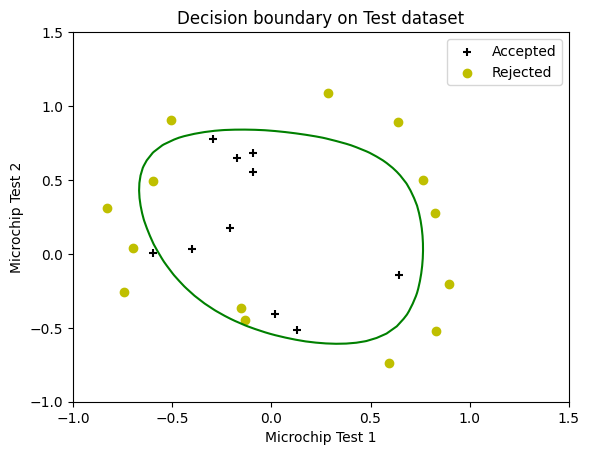

In [82]:
def plot_decision_boundary(w, b, X, y):
  plot_dataset(X[:, 0:2], y, pos_label="Accepted", neg_label="Rejected", dont_plot=True)
  if X.shape[1] <= 2:
    plot_x = np.array([min(X[:, 0]), max(X[:, 0])])
    plot_y = (-1. / w[1]) * (w[0] * plot_x + b)
    plt.plot(plot_x, plot_y, c="b")
  else:
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    z = np.zeros((len(u), len(v)))
    # Evaluate z = theta*x over the grid
    for i in range(len(u)):
        for j in range(len(v)):
            z[i,j] = sigmoid(np.dot(map_feature(u[i], v[j]), w) + b)
    # important to transpose z before calling contour
    z = z.T
    # Plot z = 0.5
    plt.contour(u,v,z, levels = [0.5], colors="g")

plot_decision_boundary(w_final, b_final, X_test, y_test)
plt.title("Decision boundary on Test dataset")
plt.show()

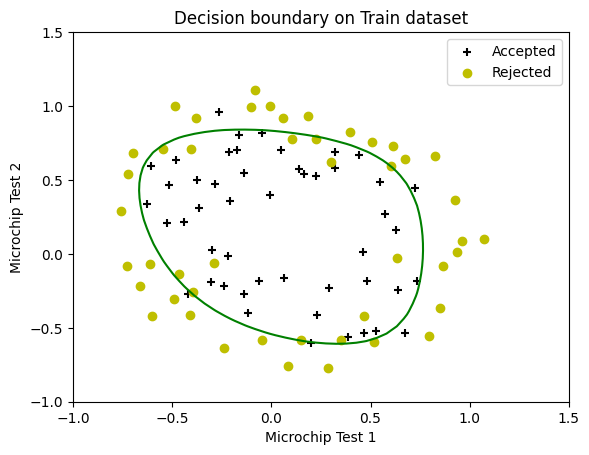

In [83]:
plot_decision_boundary(w_final, b_final, X_train, y_train)
plt.title("Decision boundary on Train dataset")
plt.show()